# Instrumental variables

My own reworking of the example code within the text book.

# The code from the CIM website does not work. So I am skipping this for now as it seems like the it is better to use the `linearmodels` package, but I'm not sure exactly how this example maps to this package.

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm

from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")

#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          1.97e-232
Time:                        14:20:54   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
card_w_const = sm.add_constant(card)


iv_reg = lm.IV2SLS(
    dependent=card_w_const["lwage"],
    exog=card_w_const[["const", "exper" , "black" , "south" , "married" , "smsa"]],
    instruments=card_w_const[["educ", "nearc4"]]
).fit(
    cov_type="homoskedastic", 
    debiased=True
)


TypeError: __init__() missing 1 required positional argument: 'endog'

In [5]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4]", card).fit()
iv_reg.summary

NameError: name 'IV2SLS' is not defined

In [9]:
card['educ']

0        7.0
1       12.0
2       12.0
3       11.0
4       12.0
        ... 
3005    12.0
3006    13.0
3007    12.0
3008    12.0
3009    13.0
Name: educ, Length: 3010, dtype: float32

In [ ]:
sm.OLS

In [1]:
url = "https://raw.github.com/scunning1975/mixtape/master/"
yule = pd.read_stata(url)


NameError: name 'pd' is not defined

**The `yule` data below shows, for each row**
- a particular `location` in England
- the level of poverty (`paup`)
- how much public assistance they received (`outrelief`)
- `old` = ??
- `pop` = size of sample/population (?)

In [3]:
yule.head()

,location,paup,outrelief,old,pop
0,Kensington,27,5,104,136
1,Paddington,47,12,115,111
2,Fulham,31,21,85,174
3,Chelsea,64,21,81,124
4,St. George’s,46,18,113,96


Either way, we can run the regression as done in the book

In [4]:
res = sm.OLS.from_formula('paup ~ outrelief + old + pop', data = yule).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   paup   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     21.49
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.00e-07
Time:                        18:46:57   Log-Likelihood:                -115.47
No. Observations:                  32   AIC:                             238.9
Df Residuals:                      28   BIC:                             244.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1877     27.144      2.328      0.027       7.586     118.789
outrelief      0.7521      0.135      5.572      0.000       0.476       1.029
old            0.0556      0.223      0.249      0.805      -0.402       0.513
pop           -0.3107      0.067     -4.648      0.000      -0.448      -0.174
==============================================================================
Omnibus:                        7.594   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.979
Skew:                           0.961   Prob(JB):                       0.0503
Kurtosis:                       3.888   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This regression shows us that increased `outrelief` (or public assistance) has a positive relationship with `paup` (poverty) —-- i.e., helping people makes them more poor.

The problem with this causal claim is that all backdoor paths likely are not closed with this model, which means that the conditional independence assumption is not met. As a result, we should not trust these causal claims. **We should only trust the causal claims of a regression model if we think the tested model satisfies the conditional independence assumption**.

## Independence assumption

In [5]:
# If we assume that this is our accurate population containing real countfactual differences
y1 = np.array([7,5,5,7,4,10,1,5,3,9])
y0 = np.array([1,6,1,8,2,1,10,6,7,8])

# Then we can easily calculate the simple difference in means (SDO), which
# represents the Average Treatement Effect (ATO)
ATE = np.mean(y1-y0)
print(f'True ATE = {ATE}')

True ATE = 0.6


However, given a sampling of this population where we only see `y1` OR `y0` for each participant, we can approximate the ATE fairly well by using the SDO.

Below is a Monte Carlo simulation which shows that, on average, the SDO between samples of a population does a good job of estimating the ATE,

In [6]:
num_simulations = 10_000

all_SDOs = list()

for _ in range(num_simulations):
    
    # `D` represents our assigments. 1 = treatment, 0 = control
    D = np.concatenate([np.ones(5), np.zeros(5)])
    
    # Randomize assignments
    random.shuffle(D)
    
    # Select the **observed** `y1` and `y0` in our sample based on the assignments
    y = D*y1 + (1-D)*y0
    
    # Index based on assignem
    y1_observed = y[D==1]
    y0_observed = y[D==0]
    
    # Calculate the simple difference in means
    SDO = np.mean(y1_observed) - np.mean(y0_observed)
    
    # Save for later
    all_SDOs.append(SDO)

In [7]:
np.mean(all_SDOs)

0.5921599999999999

#### What does the conditional independence assumption imply?
It simply implies that both groups being observed (treatment vs. control) **have the same potential outcome on average in the population.**

#### How likely is it to hold in the real world?
It seems pretty unlikely that this will hold, which is why science is often quite messy. The reason for this is because human beings in the real world do not make decisions by flipping a coin — they typical choose one option or the other based on some thought process or rationalization. As a result, we must randomize the assignment of participants into difference groups to allow for these simple comparisons to help us understand the causal effects at play.

#### Importantly, not that the SDO will *approximate* the ATE *on average*. See below the histogram of SDO estimations. Increasing sample size can reduce the variation of these estimates — which is why we often want as large of a sample as possible.

Text(0.5, 0, 'SDO estimation')

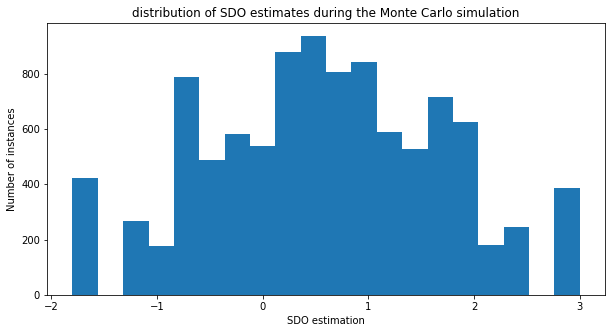

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.title("distribution of SDO estimates during the Monte Carlo simulation")
_ = plt.hist(all_SDOs, bins=20)
plt.ylabel("Number of instances")
plt.xlabel("SDO estimation")

## Fisher Randomization / Randomization Inference

Ronald Fisher described an interesting [thought experiment](https://en.wikipedia.org/wiki/Lady_tasting_tea) about a lady who believe she could tell when milk or tea was poured first into tea cup by simply tasting the tea. Apparently, this woman was real (Muriel Bristol) and in the experiment that follows, she correctly guessed all four cups of tea!

### Fisher's experiment
Fisher wanted to test whether this woman actually could do what she claimed and devised an experiment/test for her. The hypothesis, properly stated is: **given a cup of tea with milk, a woman can discern whether milk or tea was first added to the cup**.

To test this hypothesis, eight cups of tea were prepared; in four the milk was added first and in four the tea was added first. Now, we'd like to know, if she selects four of the eight cups randomly **how many cups of tea does she need to guess correctly to convince us of this ability?**

We could be relatively confident with her ability **if the likelihood of her correctly guessing the four of the cups correctly is sufficiently low**.

So Fisher devised what we now call the [**Fisher's exact test**](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

In [9]:
# Since there are 8 x 7 x 6 x 5 = 1,680 ways to select the first four cups...
four_cup_selection = 8*7*6*5

# and 4 x 3 x 2 x 1 = 24 ways to order/taste those cups...
four_cup_order = 4*3*2*1

# This means that there are 1,680 / 24 = 70 ways of selecting four cups correctly
possible_correct_selections = four_cup_selection / four_cup_order

# So she only does the test one time, so the probability of selecting all four cups
# correctly is equal to 1/70
prob_correct = 1 / possible_correct_selections

print(f"Probability of correctly guessing all four cups accurately = {prob_correct}")


Probability of correctly guessing all four cups accurately = 0.014285714285714285


#### With this probability we can simply select a threshold below which we chose to reject. The typical .05 threshold easily rejects the null hypothesis that she cannot discern whether the milk/tea was added first while a .01 threshold renders this result borderline.

### We can, of course, do this manually with a simple simulation to prove the point.

In [10]:
from itertools import combinations

# Create all possible 4 way combinations of the numbers 1 through 8 
# This basically just combines the first two steps in the cell above
# that get us to 1,680 / 24 = 70 ways of selecting four cups correctly
potential_correct_combos = list(combinations(range(1,9), 4))

# We assume that this is the correct cup combination guess that the lady must make
correct_combo = (1,2,3,4)

num_combos = len(potential_correct_combos)
num_matches = 0

for combo in potential_correct_combos:
    
    if combo == correct_combo:
        num_matches += 1
    
print(f"Number of matches = {num_matches}")
print(f"Number of potential combinations = {num_combos}")
print(f"Probability of correctly guessing all four cups accurately = {num_matches/num_combos}")

Number of matches = 1
Number of potential combinations = 70
Probability of correctly guessing all four cups accurately = 0.014285714285714285


### A more concrete example is given in the textbook with data. Note that I built this example based on the python code shared online for the book but the test statistic is different in the below example from the book. The book suggests we calculate $|\bar{Y^0} - \bar{Y^1}|$ where as this example calculates $\bar{Y^0} - \bar{Y^1}$. I.e., we do not take the absolute value difference but the actual difference.

In [11]:
url = 'https://github.com/scunning1975/mixtape/raw/master/ri.dta'
ri = pd.read_stata(url, index_col = 'name')

# Show the data
ri = ri.reset_index()
ri

,name,d,y,y0,y1
0,Andy,1,10,.,10
1,Ben,1,5,.,5
2,Chad,1,16,.,16
3,Daniel,1,3,.,3
4,Edith,0,5,5,.
5,Frank,0,7,7,.
6,George,0,8,8,.
7,Hank,0,10,10,.


In [12]:
ri['id'] = range(1,9)
treated = range(1,5)

# The below creates a dataframe which has all
# possible 4-way combinations of the participant IDs in `ri`

# These will represent the different possible ways we can assign participants
combo = pd.DataFrame(np.array(list(combinations(ri['id'], 4))), 
                     columns=['treated1', 'treated2', 'treated3', 'treated4'])

# We then label the each permutation
combo['permutation'] = np.arange(1,len(combo)+1)
combo

,treated1,treated2,treated3,treated4,permutation
0,1,2,3,4,1
1,1,2,3,5,2
2,1,2,3,6,3
3,1,2,3,7,4
4,1,2,3,8,5
...,...,...,...,...,...
65,4,5,6,7,66
66,4,5,6,8,67
67,4,5,7,8,68
68,4,6,7,8,69


In [13]:
# We now take the permutations and convert them into treatment assignments
# by merging on a common column
combo['key'] = 1
ri['key'] = 1
combo = pd.merge(ri, combo, on='key')

# Drop that key, and sort by `permutation` and then participant `name`
combo.drop('key', axis=1, inplace=True)
combo = combo.sort_values(['permutation', 'name']).reset_index(drop=True)

combo.sort_values(['permutation', 'name']).head(20)

,name,d,y,y0,y1,id,treated1,treated2,treated3,treated4,permutation
0,Andy,1,10,.,10,1,1,2,3,4,1
1,Ben,1,5,.,5,2,1,2,3,4,1
2,Chad,1,16,.,16,3,1,2,3,4,1
3,Daniel,1,3,.,3,4,1,2,3,4,1
4,Edith,0,5,5,.,5,1,2,3,4,1
5,Frank,0,7,7,.,6,1,2,3,4,1
6,George,0,8,8,.,7,1,2,3,4,1
7,Hank,0,10,10,.,8,1,2,3,4,1
8,Andy,1,10,.,10,1,1,2,3,5,2
9,Ben,1,5,.,5,2,1,2,3,5,2


The above `treatedX` columns represent the particpant `id` number who was assigned as treated for that specific permutation.

**Now we can easily set the assignment variables by check if the particpant `id` in any of these cells in the accompanying columns.**

In [14]:
combo['d'] = 0 # Overwrite with all zeros
combo.loc[(combo.treated1==combo.id) | 
          (combo.treated2==combo.id) | 
          (combo.treated3==combo.id) | 
          (combo.treated4==combo.id), 'd'] = 1

combo.head(20)

,name,d,y,y0,y1,id,treated1,treated2,treated3,treated4,permutation
0,Andy,1,10,.,10,1,1,2,3,4,1
1,Ben,1,5,.,5,2,1,2,3,4,1
2,Chad,1,16,.,16,3,1,2,3,4,1
3,Daniel,1,3,.,3,4,1,2,3,4,1
4,Edith,0,5,5,.,5,1,2,3,4,1
5,Frank,0,7,7,.,6,1,2,3,4,1
6,George,0,8,8,.,7,1,2,3,4,1
7,Hank,0,10,10,.,8,1,2,3,4,1
8,Andy,1,10,.,10,1,1,2,3,5,2
9,Ben,1,5,.,5,2,1,2,3,5,2


In [15]:
# Find the mean of all treated (1) and control (0) for each permutation
te1 = combo[combo.d==1].groupby('permutation')['y'].mean()
te0 = combo[combo.d==0].groupby('permutation')['y'].mean()

In [16]:
# Merge these columns matching on the 'perumutation' value
p_value = pd.merge(te1, te0, how='inner', on="permutation")
p_value.columns = ['te1', 'te0']
p_value = p_value.reset_index()

# Then we calculate the ATE
p_value['ate'] = p_value['te1'] - p_value['te0']

p_value = p_value.sort_values(by='ate', ascending=False)
p_value['rank'] = range(1, p_value.shape[0]+1)
n = len(p_value)
p_value = p_value[p_value['permutation'] == 1]
rank = p_value['rank'].item()
print(f'rank = {rank}')
print(f"pvalue = {rank / n}")

rank = 26
pvalue = 0.37142857142857144


### Note, I believe that the above (taken from the textbook code available online) is incorrect. Here is why...

As explained in the Causal Inference Mixtape book. We calculate the exact probability by calculating the below.

$$
\Pr \Big( t(D,Y) \ge t(D,Y | \delta = 0) \Big) = \frac{\sum_{D\in \Omega} I(t(D,Y) \ge t(D,Y)}{K}
$$

where the right side basically means — the total number of randomly generated test statistics that are **GREATER THAN OR EQUAL TO** my observed test statistic, divided by the total number of tests possible $K$ — which is simply the probability of getting an ATE that is as large as what we've observed.


By literally ranking the tests (as done above) and then taking the rank position we will get different $p$-values depending on how we decide to sort our ATE. If we directly calculate the total number of tests that are $\ge t(D,Y)$, we will get the same value every time.

In fact, we can see below - if we repeat the above process and print the frame before calculating the $p$-value from the ranking - that the value of the rank position is does not capture what it should and we are not calculating the proper $p$-value


In [17]:
# Merge these columns matching on the 'perumutation' value
p_value = pd.merge(te1, te0, how='inner', on="permutation")
p_value.columns = ['te1', 'te0']
p_value = p_value.reset_index()

# Then we calculate the ATE
p_value['ate'] = p_value['te1'] - p_value['te0']

p_value = p_value.sort_values(by='ate', ascending=False)
p_value['rank'] = range(1, p_value.shape[0]+1)

# Look at all the ATE values that are equal to 1 which are being missed!
p_value.head(50)

,permutation,te1,te0,ate,rank
24,25,11.00,5.00,6.0,1
23,24,10.75,5.25,5.5,2
22,23,10.25,5.75,4.5,3
4,5,10.25,5.75,4.5,4
64,65,10.25,5.75,4.5,5
21,22,10.25,5.75,4.5,6
44,45,9.75,6.25,3.5,7
18,19,9.75,6.25,3.5,8
20,21,9.75,6.25,3.5,9
63,64,9.75,6.25,3.5,10


### So it seems like the correct pvalue is below

In [18]:
observed_treatment_effect = p_value.loc[p_value['permutation'] == 1, 'ate'].item()
correct_pvalue = sum(p_value['ate'] >= observed_treatment_effect) / n
print(f"Correct p value = {correct_pvalue}")

Correct p value = 0.42857142857142855


### Lets do this another way to double check

In [19]:
# I create a dictionary to look up each participants yvalue outcome
treatment_effects = dict(zip(ri.name,ri.y))
treatment_effects

{'Andy': 10,
 'Ben': 5,
 'Chad': 16,
 'Daniel': 3,
 'Edith': 5,
 'Frank': 7,
 'George': 8,
 'Hank': 10}

In [20]:
all_ate_outcomes = []
all_names = set(ri.name)

possible_treated_assignments = list(combinations(ri.name,4))
num_combinations = len(possible_treated_assignments)

for treated in possible_treated_assignments:
    control = tuple(all_names.difference(set(treated)))
    
    # Use the lookup value to calculate the:
    #    ATT (average treatment treated) and
    #    ATU (avrerage treatement untreated)
    mean_treated = np.mean([treatment_effects[partic] for partic in treated])
    mean_control = np.mean([treatment_effects[partic] for partic in control])
    
    # Store the difference
    all_ate_outcomes.append(mean_treated - mean_control)

correct_pvalue2 = sum(pd.Series(all_ate_outcomes) >= 1) / num_combinations
print(f"Correct p value = {correct_pvalue2}")

assert np.allclose(correct_pvalue2, correct_pvalue), "Whoops, they don't match..."

Correct p value = 0.42857142857142855


## Other tests to control for outliers

When there are outliers, the simple difference in mean (used above) may be a problematic test statistic. Some other options are:

### 1. Difference in quantiles -> here everything is the same except we calculate the median value. In reality we could look at any of the quantile values 25th, 50th (median), 75th, etc.

In [21]:
all_ate_outcomes_median = []
all_names = set(ri.name)

possible_treated_assignments = list(combinations(ri.name,4))
num_combinations = len(possible_treated_assignments)

for treated in possible_treated_assignments:
    control = tuple(all_names.difference(set(treated)))
    
    # Use the lookup value to calculate the:
    #    ATT (average (median) treatment treated) and
    #    ATU (avrerage (median) treatement untreated)
    median_treated = np.median([treatment_effects[partic] for partic in treated]) # <-- new!
    median_control = np.median([treatment_effects[partic] for partic in control]) # <-- new!
    
    # Store the difference
    all_ate_outcomes_median.append(median_treated - median_control)

correct_pvalue2 = sum(pd.Series(all_ate_outcomes_median) >= 1) / num_combinations
print(f"Correct p value = {correct_pvalue2}")


Correct p value = 0.37142857142857144


### 2. Difference in mean rank -> here we calculate the absolute value of the simple difference in mean _rank_

### 3. Kolmogorov-Smirnov test

Given two arrays, the KS test converts both arrays into empirical cumulative distribution functions and then calculates the greatest distance between these functions

In [22]:
df = pd.DataFrame({
    'd' : np.concatenate((np.repeat(0, 20), np.repeat(1, 20))),
    'y' : (
        0.22, -0.87, -2.39, -1.79, 0.37, -1.54,
        1.28, -0.31, -0.74, 1.72,
        0.38, -0.17, -0.62, -1.10, 0.30,
        0.15, 2.30, 0.19, -0.50, -0.9,
        -5.13, -2.19, 2.43, -3.83, 0.5,
        -3.25, 4.32, 1.63, 5.18, -0.43,
        7.11, 4.87, -3.10, -5.81, 3.76,
        6.31, 2.58, 0.07, 5.76, 3.50
    )})


In [23]:
df

,d,y
0,0,0.22
1,0,-0.87
2,0,-2.39
3,0,-1.79
4,0,0.37
5,0,-1.54
6,0,1.28
7,0,-0.31
8,0,-0.74
9,0,1.72


Text(0.5, 0, 'y')

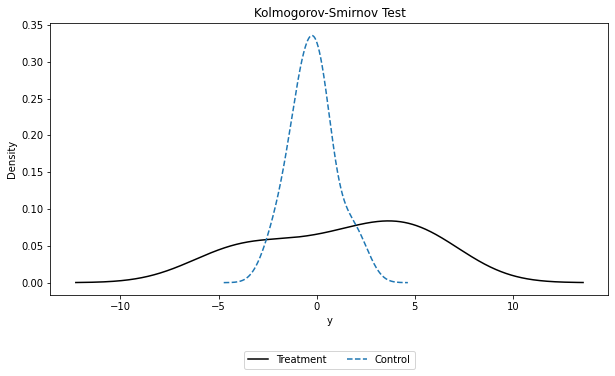

In [24]:
plt.figure(figsize=(10,5))

df[df.d == 1].y.plot(kind = 'density', label = 'Treatment', color = 'black')
df[df.d == 0].y.plot(kind = 'density', label = 'Control', linestyle = 'dashed')
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -.29), ncol = 2)

plt.title("Kolmogorov-Smirnov Test")
plt.xlabel("y")

### The above, which is included in the textbook, actually doesn't show us really anything about the KS test. This just shows us two distributions plotted together. Below I create a function that calculates the empirical cumulative distribution function of two arrays and then use the output to show you what the KS test actually tests.

In [25]:
def my_ecdf(array1, array2):
    """
    Returns the proportion of
    """
    
    array1 = np.array(array1)
    array2 = np.array(array2)
    array1size = len(array1)
    array2size = len(array2)
    
    unique_point1 = set(array1)
    unique_point2 = set(array2)
    max_unique_points = max([len(unique_point1), len(unique_point2)])
    
    max1 = max(array1)
    min1 = min(array1)
    max2 = max(array2)
    min2 = min(array2)
    
    max_ = max([max1, max2])
    min_ = max([min1, min2])
    
    x_values = np.linspace(
        start=min_,
        stop=max_,
        num = max_unique_points
    )
    
    # Array 1
    y_values1 = []
    for val in x_values:
        temp = array1[array1 <= val]
        y_values1.append(len(temp)/len(array1))
    
    # Array 2
    y_values2 = []
    for val in x_values:
        temp = array2[array2 <= val]
        y_values2.append(len(temp)/len(array2))
    
    return x_values, np.array(y_values1), np.array(y_values2)
        

In [26]:
x,y0,y1 = my_ecdf(df[df.d == 0]['y'], df[df.d == 1]['y'])

difference_values = abs(y0 - y1)

max_val = np.max(difference_values)
max_val_idx = np.argmax(difference_values)

low_point = min([y0[max_val_idx], y1[max_val_idx]])
high_point = max([y0[max_val_idx], y1[max_val_idx]])

### The black line is the distance used for the KS test. Theoretically, if the numbers in each array are drawn from the same distribution the distance should be zero. So the KS test just takes the largest distance between the ECDF of each array.

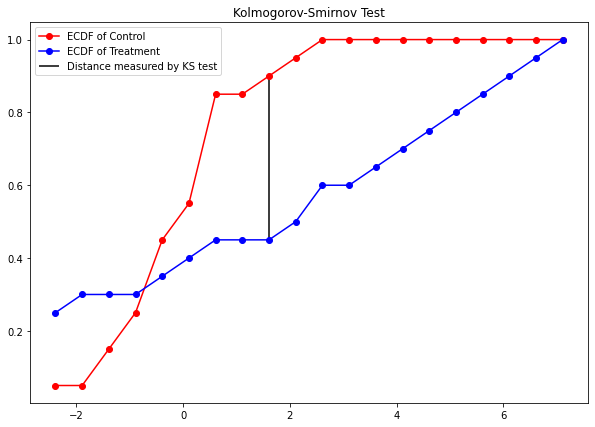

In [27]:
plt.figure(figsize=(10,7))
plt.title("Kolmogorov-Smirnov Test")
plt.plot(x,y0, 'r-o', label="ECDF of Control")
plt.plot(x,y1, 'b-o', label="ECDF of Treatment")
plt.vlines(x[max_val_idx], ymin=low_point, ymax=high_point, color='black', label='Distance measured by KS test')
plt.legend()

## Approximate $p$-value

In the earlier examples we calculated **exact $p$-values** — but this was only possible because the sample size is small (all number of possible permutations of assignment grows rapidly). What do we do if we have large samples?

The answer is simply to randomly assign your participants to the treatment or control group many many times and estimate the ATE. Then — just like before - calculate the number of estimated ATEs that are $\ge$ to the observed ATE. This will represent an **approximate $p$-value**.

In [28]:
url = "https://github.com/scunning1975/mixtape/raw/master/thornton_hiv.dta"

hiv = pd.read_stata(url)


In [30]:

def permuteHIV(df, random = True):
    tb = df.copy()
    first_half = np.ceil(tb.shape[0] / 2)
    second_half = tb.shape[0] - first_half
    
    if random:
        tb = tb.sample(frac=1)
        tb['any'] = np.concatenate((
            np.repeat(1, first_half),
            np.repeat(0, second_half)
        ))
    
    te1 = tb[tb['any']==1]['got'].mean()
    te0 = tb[tb['any']==0]['got'].mean()
    
    ate = te1 - te0
    return ate

def get_pvalue(permutation, observed_ate, iterations):
    permutation = permutation.sort_values('ate', ascending=False)
    permutation['rank'] = np.arange(1, iterations+1)
    return sum(permutation['ate'] >= observed_ate) / len(permutation)

observed_ate = permuteHIV(hiv, random = False)
print(f"ATE without randomization = {observed_ate}\n")
iterations = 1000
print("Running all simulations...")


iterations = [100,500,1000]

results = []
for iters in iterations:
    permutation = pd.DataFrame({
        'iteration': range(iters),
        'ate' : [permuteHIV(hiv, random=False), 
                                *[permuteHIV(hiv, random=True) for x in range(iters-1)]]}
    )
    pval = get_pvalue(permutation, observed_ate, iters)
    results.append((iters,pval))
    
pd.DataFrame(results, columns = ['num_iterations','pvalue'])

ATE without randomization = 0.4505518674850464

Running all simulations...


,num_iterations,pvalue
0,100,0.010
1,500,0.002
2,1000,0.001
